# **Distributions**

In this example notebook, I will be exploring, explaining, and providing examples of various types of statistical distribution.

Distributions are a statistical function that shows the possible values of a variable and it's frequency of occurence. It serves up a mathematical description of the data's behavior indicating where most data points are concentrated and how they are spread out.

Distributions can be represented in various ways -> probability density functions for continuous data or probability mass functions for discrete data.

- **Probability Function** -> Used to assign probabilities to different possible outcomes in a data set.

- **Probability Density Function** (PDF) -> Used for continuous variables, does not give exact probability of one values, rather it shows the likelihood of a value falling within a certian range.

- **Cumulative Distribution Function** (CDF) -> Probability that a variable takes a value lass than or equal to a specific point.

## Contents

- [Continuous](#Continuous)
- [Discrete](#Discrete)
- [Normal](#Normal)
- [Binomial](#Binomial)
- [Poisson](#Poisson)
- [Exponential](#Exponential)
- [Uniform](#Uniform)
- [T-Distribution](#T-Distribution)


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

First, ensure to import **matplotlib** to create example distribution visualizations, **numpy** for dummy data generation, and **norm** from **scipy.stats** to access Probability Density Function(PDF) for computing the bellshaped curve. 

### **Continuous**

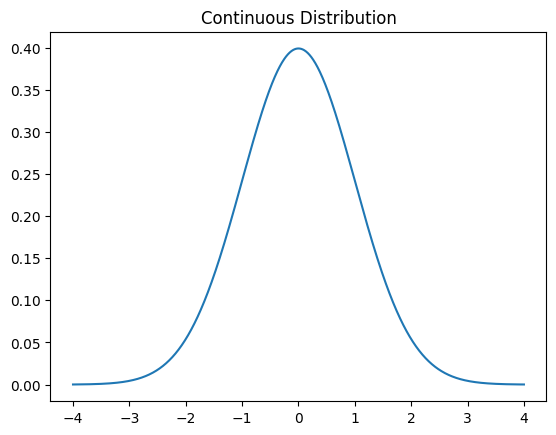

In [42]:
normal_dist_dataset = np.linspace(-4, 4, 1000)
plt.plot(normal_dist_dataset, norm.pdf(normal_dist_dataset, 0, 1))

plt.title("Continuous Distribution")
plt.show()

- A **continuous distribution** is used when the data can take any value within a range, including fractions and decimals. Measures things like height, weight, temperature or time.
- Common continuous distributions included: Normal and Exponential distributions.
- np.linspace(x, y, z) method from numpy is used to generate _**z**_ data points within the range of _**x**_ - _**y**_. THese values are automatically spaced evenly.
- norm.pdf(params) uses Probability Density function, which gives the density (curve height) of how likely values near a point are. For ex) the area under the curve between two arbitrary points _is_ the probability.

### **Discrete**

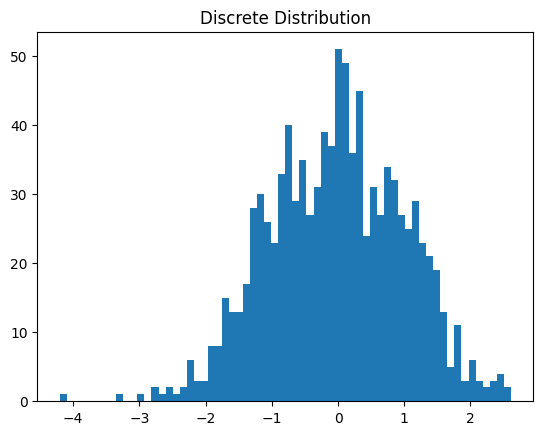

In [50]:
data = np.random.randn(1000)
plt.hist(data, bins=64)
plt.title("Discrete Distribution")
plt.show()

- A **discrete distribution** is used when the data can only take seperate values, whole numbers.
- Common types of discrete distributions are Binomial and Poisson distributions. 

### **Normal**

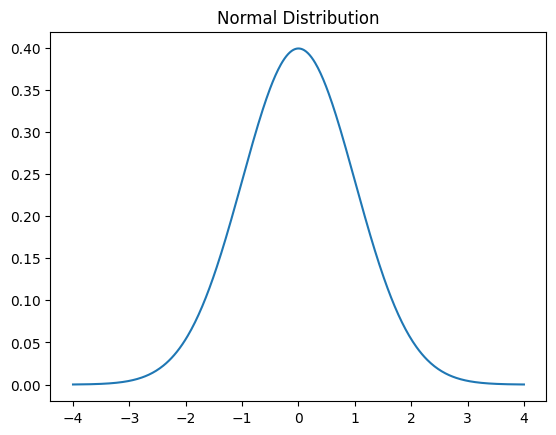

In [56]:
normal_dist_dataset = np.linspace(-4, 4, 500)
plt.plot(normal_dist_dataset, norm.pdf(normal_dist_dataset, 0, 1))

plt.title("Normal Distribution")
plt.show()

- A **normal distribution** is a continuous probability distribution that is symmetric centerd on the mean, where the data closer to the mean has higher frequency than data further from the mean.

### **Binomial**

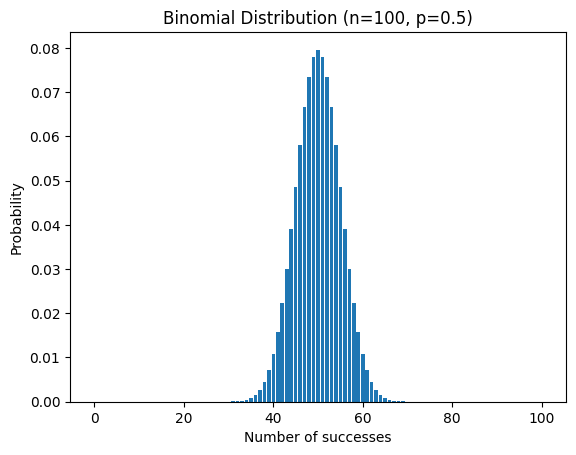

In [90]:
from scipy.stats import binom

n = 100 # number of trials
p = 0.5 #prob of success

# Possible outcomes
x = np.arange(0, n+1)

#Binomial PMF -> Probability Mass Function
pmf = binom.pmf(x, n, p)
        
plt.bar(x, pmf)
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of successes")
plt.ylabel("Probability")

plt.show()



# NOTE TO SELF

Figure out how to better display a left and right skewed binomial distribution and continue.